In [2]:
pip install unidecode

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from unidecode import unidecode
import seaborn as sns
%matplotlib inline

import os
import pandas as pd
from multiprocessing import Pool, cpu_count

def leer_excel_con_encabezado(ruta_completa):
    encontrado = False
    for i in range(10):  # Puedes ajustar el rango según cuántas filas quieras buscar
        df_temp = pd.read_excel(ruta_completa, header=i)
        if "Fecha" in df_temp.columns:
            df = pd.read_excel(ruta_completa, header=i)
            encontrado = True
            break
    if not encontrado:
        # Si no se encuentra "Fecha" en las primeras 10 filas, usa la tercera fila como encabezado predeterminado
        df = pd.read_excel(ruta_completa, header=2)
    return df

ruta_data = "D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Data"
archivos_excel = [os.path.join(ruta_data, archivo) for archivo in os.listdir(ruta_data) if archivo.endswith(".xlsx")]

if __name__ == "__main__":
    with Pool(processes=cpu_count()) as pool:
        dataframes1 = pool.map(leer_excel_con_encabezado, archivos_excel)

import os
dataframes1=[]
ruta_data = "D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa"  # Cambia esta ruta por la ubicación de tu carpeta "data"
for archivo in os.listdir(ruta_data):
    if archivo.endswith(".xlsx"):  # Solo carga archivos Excel
        ruta_completa = os.path.join(ruta_data, archivo)
        
        # Lee las primeras filas del archivo para encontrar la fila que contiene "Fecha"
        encontrado = False
        for i in range(10):  # Puedes ajustar el rango según cuántas filas quieras buscar
            df_temp = pd.read_excel(ruta_completa, header=i)
            if "Fecha" in df_temp.columns:
                df = pd.read_excel(ruta_completa, header=i)
                encontrado = True
                break
        
        if not encontrado:
            # Si no se encuentra "Fecha" en las primeras 10 filas, usa la tercera fila como encabezado predeterminado
            df = pd.read_excel(ruta_completa, header=2)
            
        dataframes1.append(df)

In [4]:
dataframes=[]
df1=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_1995.xlsx",header=2)
dataframes.append(df1)
print(1)
df2=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_1996.xlsx",header=0)
dataframes.append(df2)
print(1)
df3=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_1997.xlsx",header=1)
dataframes.append(df3)
print(1)
df4=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_1998.xlsx",header=1)
dataframes.append(df4)
print(1)
df5=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_1999.xlsx",header=1)
dataframes.append(df5)
print(1)
df6=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_2000.xlsx",header=2)
dataframes.append(df6)
print(1)
df7=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_2001.xlsx",header=1)
dataframes.append(df7)
print(1)
df8=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_2002.xlsx",header=1)
dataframes.append(df8)
print(1)
df9=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_2003.xlsx",header=2)
dataframes.append(df9)
print(1)
df10=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_2004.xlsx",header=1)
dataframes.append(df10)
print(1)
df11=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_2005.xlsx",header=1)
dataframes.append(df11)
print(1)
df12=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_2006.xlsx",header=2)
dataframes.append(df12)
print(1)
df13=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_2007.xlsx",header=2)
dataframes.append(df13)
print(1)
df14=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_2008.xlsx",header=2)
dataframes.append(df14)
print(1)
df15=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_2009.xlsx",header=2)
dataframes.append(df15)
print(1)
df16=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_2010.xlsx",header=2)
dataframes.append(df16)
print(1)
df17=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_2011.xlsx",header=2)
dataframes.append(df17)
print(1)
df18=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_2012.xlsx",header=2)
dataframes.append(df18)
print(1)
df19=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_2013.xlsx",header=2)
dataframes.append(df19)
print(1)
df20=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_2014.xlsx",header=2)
dataframes.append(df20)
print(1)
df21=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_2015.xlsx",header=2)
dataframes.append(df21)
print(1)
df22=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_2016.xlsx",header=2)
dataframes.append(df22)
print(1)
df23=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_2017 .xlsx",header=2)
dataframes.append(df23)
print(1)
df24=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_2018.xlsx",header=2)
dataframes.append(df24)
print(1)
df25=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_2019.xlsx",header=2)
dataframes.append(df25)
print(1)
df26=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_2020.xlsx",header=2)
dataframes.append(df26)
print(1)
df27=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_2021.xlsx",header=2)
dataframes.append(df27)
print(1)
df28=pd.read_excel("D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\Dataa\Generacion_(kWh)_2022.xlsx",header=2)
dataframes.append(df28)
print(1)

              

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


# Evolucion del la generacion electrica en el pais entre los años 1995 y 2022

## Determinacion del total generado por cada planta

In [5]:
modified_dataframes=[]
for dataframe in range(len(dataframes)):
    #if dataframe ==2:
     #   break
    dfcopy=dataframes[dataframe].copy()
    if "Version" in dfcopy.columns:
        dfcopy=dfcopy.drop(columns=["Fecha","Version"])
    else:
        dfcopy=dfcopy.drop(columns=["Fecha"])
    try:  
        dfcopy=dfcopy.groupby(dfcopy.columns[:dfcopy.columns.get_loc("0")].tolist()).sum()
    except:
        dfcopy=dfcopy.groupby(dfcopy.columns[:dfcopy.columns.get_loc(0)].tolist()).sum()
    dfcopy["Total"]=dfcopy[dfcopy.columns].sum(axis=1)
    #print(f'the GWH generation of {year} is {dfcopy["Total"].sum()/1000000}')
    modified_dataframes.append(dfcopy)
    

## Total generado para cada año en GWH

In [6]:

years=[]
generation=[]
df=pd.DataFrame(columns=["Year","Generation(GWH)"])
for dataframe in range(len(modified_dataframes)):
    try:
        print(dataframes[dataframe]["Fecha"].iloc[0].year,":", modified_dataframes[dataframe]["Total"].sum()/1000000,"GWH")
        years.append(dataframes[dataframe]["Fecha"].iloc[0].year)
        generation.append( modified_dataframes[dataframe]["Total"].sum()/1000000)
    except:
        print(dataframes[dataframe]["Fecha"].iloc[0][:4],":", modified_dataframes[dataframe]["Total"].sum()/1000000,"GWH")
        years.append(dataframes[dataframe]["Fecha"].iloc[0][:4])
        generation.append( modified_dataframes[dataframe]["Total"].sum()/1000000)

1995 : 18148.37255 GWH
1996 : 40248.74319 GWH
1997 : 41681.9748 GWH
1998 : 42421.28081 GWH
1999 : 40511.69605 GWH
2000 : 41278.09603334 GWH
2001 : 43047.7228248 GWH
2002 : 44735.12747873 GWH
2003 : 46734.196114210004 GWH
2004 : 48561.82794695 GWH
2005 : 50429.75917803 GWH
2006 : 52340.04832582 GWH
2007 : 53626.12305507 GWH
2008 : 54394.997956089996 GWH
2009 : 55965.62580272 GWH
2010 : 56787.631665019995 GWH
2011 : 58620.42794093 GWH
2012 : 59890.06965843999 GWH
2013 : 62196.5874195 GWH
2014 : 64327.85489093 GWH
2015 : 66548.47393104 GWH
2016 : 65942.17268603001 GWH
2017 : 66667.09728997 GWH
2018 : 68948.23231497 GWH
2019 : 70114.59842360001 GWH
2020 : 69323.55607589 GWH
2021 : 73933.54879605 GWH
2022 : 76908.44907283 GWH


In [7]:
sum=0
for i in generation:
    sum=sum+i
sum

1534334.29228096

## Grafica de la evolucion de la generacion electrica en GWH/Año

<Axes: xlabel='Year'>

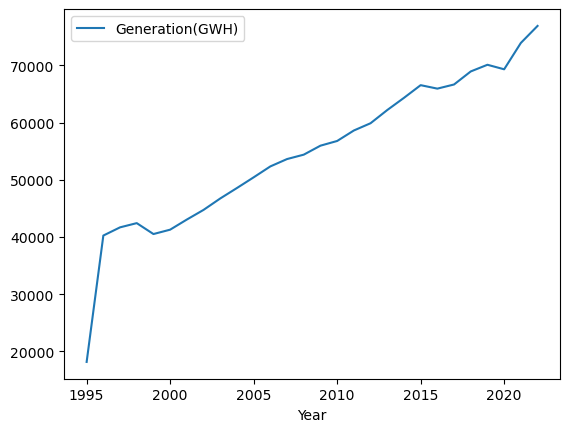

In [8]:
df["Year"]=years
df["Generation(GWH)"]=generation
df.plot(x="Year",y="Generation(GWH)")

# Modelo de regresion lineal para predecir valores de generacion futuros

El valor que predice el modelo de regresion linea es 77296.77 GhH de color rojo en la grafica,Mientras que el valor real es 80687.35 GWH (naranja)


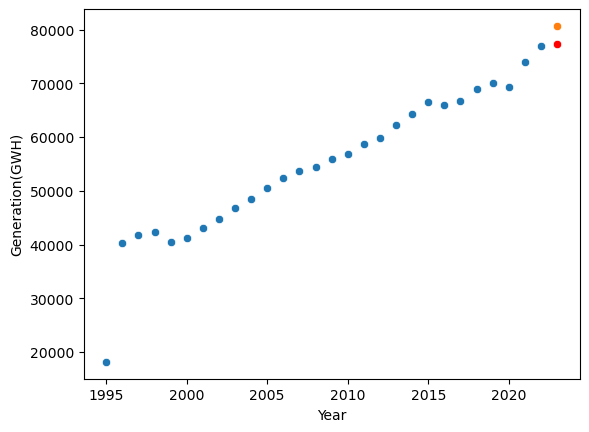

la diferencia entre el valor predicho y el valor verdadero es: 4.2 %


In [9]:

temp_reg=LinearRegression()
#df=df.loc[df["Year"] >1995]
temp_reg.fit(np.array(df["Year"]).reshape(-1,1),np.array(df["Generation(GWH)"]).reshape(-1,1))
prediccion= temp_reg.predict(np.array(2023).reshape(1,-1)).item()
#print(temp_reg.intercept_, temp_reg.coef_)
print(f"El valor que predice el modelo de regresion linea es {round(prediccion,2)} GhH de color rojo en la grafica,Mientras que el valor real es 80687.35 GWH (naranja)")
sns.scatterplot(x="Year",y="Generation(GWH)",data=df)
sns.scatterplot(x=[2023],y=prediccion,color="red")
sns.scatterplot(x=[2023],y=80687.35)#dato verdadero sacado del dashboaard
plt.show()
print(f"la diferencia entre el valor predicho y el valor verdadero es: {round((80687.35-prediccion)/80687.35*100,2)} %")


# Union de los datos en un solo dataframe

### Normalizacion de las columnas de los dataframes

In [10]:
dataframes1=dataframes.copy()
def columnas(df):
    if 0 in df.columns:
        #si hay un int en las columnas primero me convierte todas los int en str y luego le quita las tildes a las columnas
        keys=df.columns.tolist()
        values=df.columns.astype(str)
        dic=dict(zip(keys,values))
        df.rename(columns=dic,inplace=True)
        keys1=df.columns.tolist()
        values2=[unidecode(value) for value in df.columns.tolist()]
        df.rename(columns=dict(zip(keys1,values2)),inplace=True)
    else:
        values=df.columns.astype(str)
        keys=df.columns.tolist()
        values=[unidecode(value) for value in df.columns.tolist()]
        dic=dict(zip(keys,values))
        df.rename(columns=dic,inplace=True)
for i in range(len(dataframes1)):
    columnas(dataframes1[i])
dataframes[22].columns

Index(['Fecha', 'Recurso', 'Tipo Generacion', 'Combustible', 'Codigo Agente',
       'Tipo Despacho', 'Es Menor', 'Es Autogenerador', '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', 'Version'],
      dtype='object')

### Union de los dataframes

In [137]:

common=[]
for i in dataframes1[0].columns:
    if i in dataframes1[1].columns:
        common.append(i)
union = dataframes1[0].merge(dataframes1[1], how="outer", on=common)
for i in range(len(dataframes1)):
    if i < 2:
        pass 
    else:
        common=[]
        for b in union.columns:
            if b in dataframes1[i].columns: 
                common.append(b)
        
        # Convertir la columna 'Fecha' en ambos DataFrames al tipo 'datetime64[ns]'
        union['Fecha'] = pd.to_datetime(union['Fecha'])
        dataframes1[i]['Fecha'] = pd.to_datetime(dataframes1[i]['Fecha'])
        
        # Fusionar los DataFrames
        union = union.merge(dataframes1[i], how="outer", on=common)

C:\Users\mateo\AppData\Local\Temp\ipykernel_20704\1894016051.py:20: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  union = union.merge(dataframes1[i], how="outer", on=common)


# Preparacion y limpieza de datos

#### Debido a que se realizara un analisis por tipo de generacion es importante la verificacion de estos datos

In [138]:
union["Tipo Generacion"].value_counts()

Tipo Generacion
HIDRAULICA     820333
TERMICA        257401
COGENERADOR     76728
SOLAR           13047
EOLICA           6687
Solar              14
Name: count, dtype: int64

In [139]:
union["Tipo Generacion"].unique()

array(['TERMICA', 'HIDRAULICA', nan, 'COGENERADOR', 'EOLICA', 'SOLAR',
       'Solar'], dtype=object)

### Hay una discrepanacia en la categorizacion de las plantas de energia solar por lo que se procedera a corregirla

In [140]:
union["Tipo Generacion"]=union["Tipo Generacion"].replace("Solar","SOLAR")
union["Tipo Generacion"].value_counts()

Tipo Generacion
HIDRAULICA     820333
TERMICA        257401
COGENERADOR     76728
SOLAR           13061
EOLICA           6687
Name: count, dtype: int64

In [141]:
union["Total"]=union[union.columns[5:29]].sum(axis=1)/1000000
union=union[['Fecha', 'Recurso', 'Codigo Agente', 'Tipo Generacion', 'Tipo Despacho','Combustible', 'Version', 'Es Menor', 'Es Autogenerador',
       'Codigo Recurso', 'Clasificacion',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23','Total',
       ]]
union.head()

,Fecha,Recurso,Codigo Agente,Tipo Generacion,Tipo Despacho,Combustible,Version,Es Menor,Es Autogenerador,Codigo Recurso,...,15,16,17,18,19,20,21,22,23,Total
0,1995-07-20,EL RIO 6,ATLG,TERMICA,DESPACHADO CENTRALMENTE,NaN,NaN,NaN,NaN,NaN,...,8810.0,8810.0,8820.0,8820.0,8860.0,8870.0,8890.0,8920.0,8780.0,0.21302
1,1995-07-20,EL RIO 2,ATLG,TERMICA,DESPACHADO CENTRALMENTE,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2,1995-07-20,LA UNION 3,ATLG,TERMICA,DESPACHADO CENTRALMENTE,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,1995-07-20,EL RIO 7,ATLG,TERMICA,DESPACHADO CENTRALMENTE,NaN,NaN,NaN,NaN,NaN,...,9190.0,9260.0,9310.0,9320.0,9290.0,9240.0,9260.0,9350.0,9180.0,0.21973
4,1995-07-20,LA UNION 4,ATLG,TERMICA,DESPACHADO CENTRALMENTE,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


In [142]:
union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175003 entries, 0 to 1175002
Data columns (total 36 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Fecha             1175003 non-null  datetime64[ns]
 1   Recurso           1175003 non-null  object        
 2   Codigo Agente     1175003 non-null  object        
 3   Tipo Generacion   1174210 non-null  object        
 4   Tipo Despacho     1175003 non-null  object        
 5   Combustible       920999 non-null   object        
 6   Version           920999 non-null   object        
 7   Es Menor          525496 non-null   object        
 8   Es Autogenerador  258157 non-null   object        
 9   Codigo Recurso    267339 non-null   object        
 10  Clasificacion     267339 non-null   object        
 11  0                 1088464 non-null  float64       
 12  1                 1077197 non-null  float64       
 13  2                 1074716 non-null  float6

In [143]:
union[union.isin([np.inf, -np.inf])]


In [150]:
union.isna()


,Fecha,Recurso,Codigo Agente,Tipo Generacion,Tipo Despacho,Combustible,Version,Es Menor,Es Autogenerador,Codigo Recurso,...,15,16,17,18,19,20,21,22,23,Total
0,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174998,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1174999,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1175000,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1175001,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [136]:
union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175003 entries, 0 to 1175002
Data columns (total 36 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Fecha             1175003 non-null  datetime64[ns]
 1   Recurso           1175003 non-null  object        
 2   Codigo Agente     1175003 non-null  object        
 3   Tipo Generacion   1174210 non-null  object        
 4   Tipo Despacho     1175003 non-null  object        
 5   Combustible       920999 non-null   object        
 6   Version           920999 non-null   object        
 7   Es Menor          525496 non-null   object        
 8   Es Autogenerador  258157 non-null   object        
 9   Codigo Recurso    267339 non-null   object        
 10  Clasificacion     267339 non-null   object        
 11  0                 1088464 non-null  float64       
 12  1                 1077197 non-null  float64       
 13  2                 1074716 non-null  float6

In [166]:
faltantes= union[union["Tipo Generacion"].isna()]
faltantes[["Recurso","Total"]]

,Recurso,Total
23175,GUALANDAY 2,0.03441
23250,GUALANDAY 3,0.00000
23325,GUALANDAY 4,0.00000
23400,GUALANDAY 5,0.00000
23475,GUALANDAY 6,0.04611
...,...,...
125973,COGENERADOR INGENIO,0.00000
126034,COGENERADOR INGENIO,0.00000
126095,COGENERADOR INGENIO,0.00000
126156,COGENERADOR INGENIO,0.00000


In [234]:
grouped=union.groupby([pd.Grouper(key='Fecha', freq='Y'),"Tipo Generacion"])
result = grouped.sum(numeric_only=True)
result.head()



0            1            2  \
Fecha      Tipo Generacion                                          
1995-12-31 HIDRAULICA       399972850.0  377728400.0  370693050.0   
           TERMICA          136551930.0  131628010.0  130874640.0   
1996-12-31 HIDRAULICA       963716220.0  918527100.0  899791850.0   
           TERMICA          228276680.0  222025450.0  219506180.0   
1997-12-31 HIDRAULICA       817569880.0  773925390.0  753352000.0   

                                      3             4             5  \
Fecha      Tipo Generacion                                            
1995-12-31 HIDRAULICA       375835760.0  4.160726e+08  5.202032e+08   
           TERMICA          131111750.0  1.358635e+08  1.413635e+08   
1996-12-31 HIDRAULICA       910186140.0  1.004733e+09  1.243094e+09   
           TERMICA          220067660.0  2.245825e+08  2.352098e+08   
1997-12-31 HIDRAULICA       763170760.0  8.514765e+08  1.075010e+09   

                                       6             7             8  \
Fecha      Tipo Generacion                                             
1995-12-31 HIDRAULICA       6.192640e+08  6.493274e+08  6.865863e+08   
           TERMICA          1.467078e+08  1.507113e+08  1.511833e+08   
1996-12-31 HIDRAULICA       1.437637e+09  1.514258e+09  1.592054e+09   
           TERMICA          2.466892e+08  2.564507e+08  2.610362e+08   
1997-12-31 HIDRAULICA       1.248506e+09  1.332263e+09  1.413254e+09   

                                       9  ...            15            16  \
Fecha      Tipo Generacion                ...                               
1995-12-31 HIDRAULICA       7.015136e+08  ...  5.941288e+08  6.122166e+08   
           TERMICA          1.494824e+08  ...  1.493982e+08  1.507376e+08   
1996-12-31 HIDRAULICA       1.620367e+09  ...  1.378523e+09  1.401310e+09   
           TERMICA          2.599326e+08  ...  2.635078e+08  2.674320e+08   
1997-12-31 HIDRAULICA       1.443807e+09  ...  1.238036e+09  1.250775e+09   

                                      17            18            19  \
Fecha      Tipo Generacion                                             
1995-12-31 HIDRAULICA       6.707906e+08  8.509316e+08  8.642809e+08   
           TERMICA          1.631754e+08  1.748048e+08  1.765747e+08   
1996-12-31 HIDRAULICA       1.498071e+09  1.905933e+09  2.003380e+09   
           TERMICA          2.916870e+08  3.286850e+08  3.327309e+08   
1997-12-31 HIDRAULICA       1.346764e+09  1.770533e+09  1.872625e+09   

                                      20            21            22  \
Fecha      Tipo Generacion                                             
1995-12-31 HIDRAULICA       7.912585e+08  6.887887e+08  5.511178e+08   
           TERMICA          1.716170e+08  1.639406e+08  1.546346e+08   
1996-12-31 HIDRAULICA       1.844410e+09  1.612007e+09  1.295887e+09   
           TERMICA          3.208734e+08  3.011269e+08  2.740947e+08   
1997-12-31 HIDRAULICA       1.725656e+09  1.482343e+09  1.164097e+09   

                                      23        Total  
Fecha      Tipo Generacion                             
1995-12-31 HIDRAULICA       4.442190e+08  14537.42378  
           TERMICA          1.456604e+08   3610.94877  
1996-12-31 HIDRAULICA       1.067632e+09  33946.91049  
           TERMICA          2.465180e+08   6301.83270  
1997-12-31 HIDRAULICA       9.285458e+08  30275.33572  

[5 rows x 25 columns]

In [235]:
result=result.reset_index()
result["Fecha"]=result["Fecha"].dt.year
result["Total"].sum()
result.to_csv("EnergiaElectricaColombia.csv")

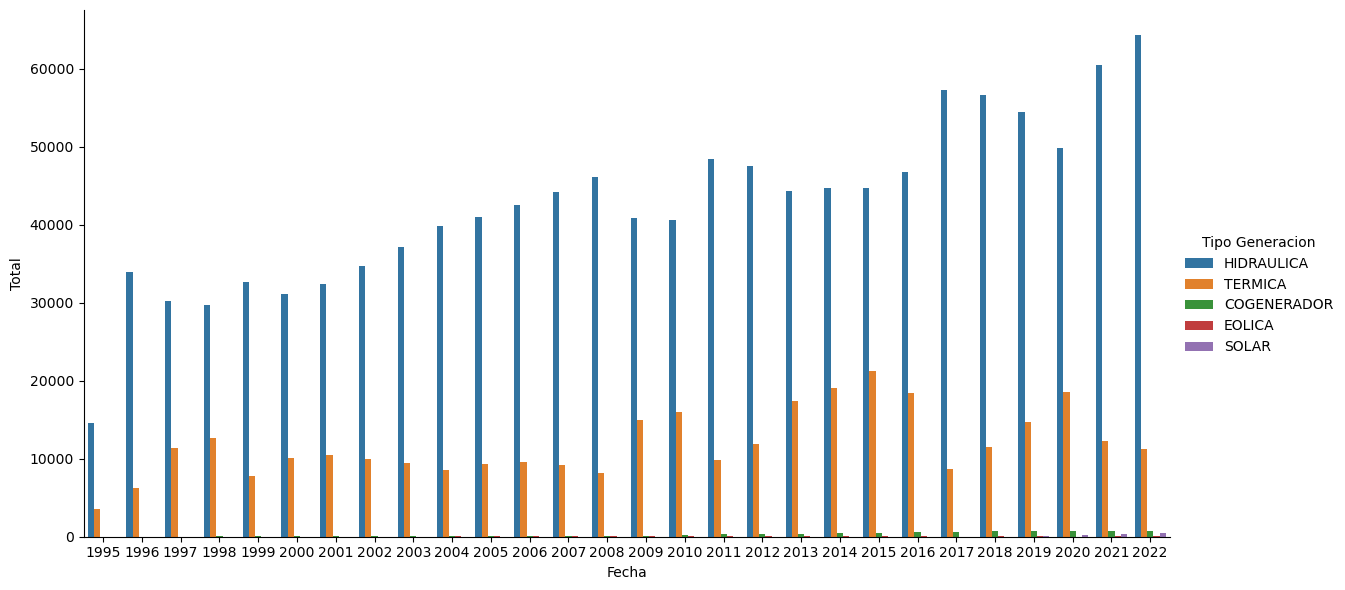

In [228]:
sns.catplot( data=result, kind="bar", x="Fecha", y="Total", hue="Tipo Generacion", height=6, aspect=2)

c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mateo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

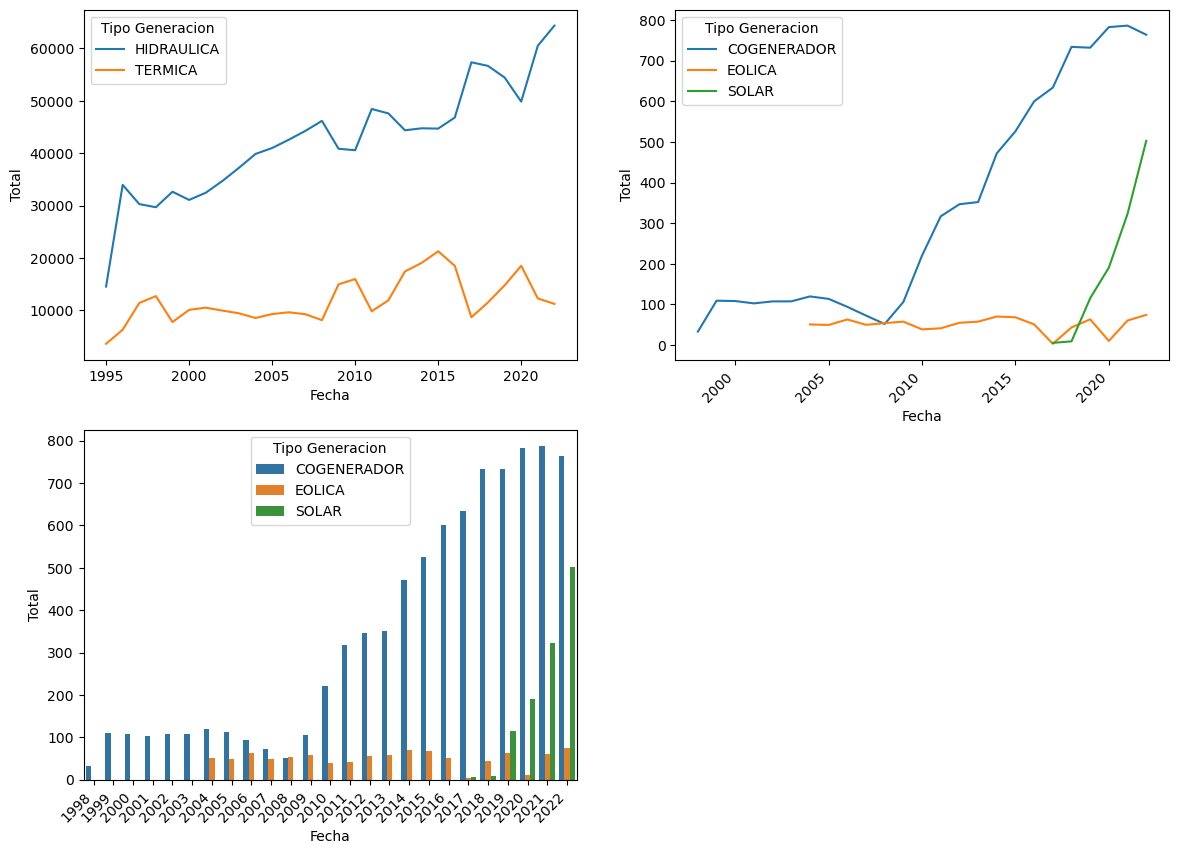

In [230]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.lineplot(x="Fecha",y="Total",data=result.loc[(result["Tipo Generacion"]=="HIDRAULICA") | (result["Tipo Generacion"]=="TERMICA")],hue="Tipo Generacion")
plt.subplot(2,2,2)
sns.lineplot(x="Fecha",y="Total",data=result.loc[(result["Tipo Generacion"]=="EOLICA") | (result["Tipo Generacion"]=="SOLAR") | (result["Tipo Generacion"]=="COGENERADOR") ],hue="Tipo Generacion")
plt.xticks(rotation=45, ha='right')
plt.subplot(2,2,3)
sns.barplot(x="Fecha",y="Total",data=result.loc[(result["Tipo Generacion"]=="EOLICA") | (result["Tipo Generacion"]=="SOLAR") | (result["Tipo Generacion"]=="COGENERADOR")],hue="Tipo Generacion")
plt.xticks(rotation=45, ha='right')
plt.show()



In [231]:
result=result.pivot(index="Fecha",columns='Tipo Generacion',values='Total')
result=result.replace(np.nan,0)
result["Total"]=result[result.columns].sum(numeric_only=True,axis=1)
result["Renovable"]=round(result[["EOLICA","HIDRAULICA","SOLAR"]].sum(numeric_only=True,axis=1)/result["Total"] *100,2)
result["Total"]=result["Total"].apply(lambda x: int(x))
result["Renovable"]=result["Renovable"].apply(lambda x: int(x))
result.head(10)


Tipo Generacion,COGENERADOR,EOLICA,HIDRAULICA,SOLAR,TERMICA,Total,Renovable
Fecha,,,,,,,
1995,0.000000,0.000000,14537.423780,0.0,3610.948770,18148,80
1996,0.000000,0.000000,33946.910490,0.0,6301.832700,40248,84
1997,0.000000,0.000000,30275.335720,0.0,11406.639080,41681,72
1998,33.061290,0.000000,29677.509580,0.0,12710.709940,42421,69
1999,109.210580,0.000000,32637.079740,0.0,7765.405730,40511,80
2000,108.359899,0.000000,31074.284244,0.0,10095.451890,41278,75
2001,102.609715,0.000000,32438.925450,0.0,10506.187660,43047,75
2002,107.490692,0.000000,34670.243073,0.0,9957.393714,44735,77
2003,107.590968,0.000000,37196.647837,0.0,9429.957309,46734,79


In [233]:
result.to_csv("EnergiaElectricaColombia1.csv")

# Webscraping

In [82]:
oni=pd.read_csv('D:\Documentos\Github\Projects\Personal Projects\Generacion electrica en Colombia\webscraping\datos_extraidos_tabla_9_ONI_v5.php.csv')
oni=oni.drop(oni[oni["Year"]=="Year"].index)
oni=oni.apply(pd.to_numeric, errors='coerce')
oni=oni.loc[oni["Year"]>=1995]
oni["Total"]=oni[oni.columns[1:]].sum(axis=1)
oni["Niñoa"]=oni["Total"].apply(lambda x: "Niño" if x > 0 else "Niña")


In [87]:
oni[["Year","Niñoa"]]

,Year,Niñoa
49,1995,Niña
50,1996,Niña
51,1997,Niño
52,1998,Niña
53,1999,Niña
55,2000,Niña
56,2001,Niña
57,2002,Niño
58,2003,Niño
59,2004,Niño


,Year,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ,Total,Niñoa
49,1995,1.0,0.7,0.5,0.3,0.1,0.0,-0.2,-0.5,-0.8,-1.0,-1.0,-1.0,-1.9,Niña
50,1996,-0.9,-0.8,-0.6,-0.4,-0.3,-0.3,-0.3,-0.3,-0.4,-0.4,-0.4,-0.5,-5.6,Niña
51,1997,-0.5,-0.4,-0.1,0.3,0.8,1.2,1.6,1.9,2.1,2.3,2.4,2.4,14.0,Niño
52,1998,2.2,1.9,1.4,1.0,0.5,-0.1,-0.8,-1.1,-1.3,-1.4,-1.5,-1.6,-0.8,Niña
53,1999,-1.5,-1.3,-1.1,-1.0,-1.0,-1.0,-1.1,-1.1,-1.2,-1.3,-1.5,-1.7,-14.8,Niña
55,2000,-1.7,-1.4,-1.1,-0.8,-0.7,-0.6,-0.6,-0.5,-0.5,-0.6,-0.7,-0.7,-9.9,Niña
56,2001,-0.7,-0.5,-0.4,-0.3,-0.3,-0.1,-0.1,-0.1,-0.2,-0.3,-0.3,-0.3,-3.6,Niña
57,2002,-0.1,0.0,0.1,0.2,0.4,0.7,0.8,0.9,1.0,1.2,1.3,1.1,7.6,Niño
58,2003,0.9,0.6,0.4,0.0,-0.3,-0.2,0.1,0.2,0.3,0.3,0.4,0.4,3.1,Niño
59,2004,0.4,0.3,0.2,0.2,0.2,0.3,0.5,0.6,0.7,0.7,0.7,0.7,5.5,Niño
